## Kelman Filter From Sctractch (Python)
- For the sake of implementing this on provided data, following steps will be taken, as mentioned in the assessment:
    * Defining a Constant Velocity Motion Model having a pre-defined derivative
    * Defining the Cartesian Obervation Model (COM)
    * Defining Covariance Matrices (CMs)
    * Initializing Conariance & State Metrices (CSMs)
    * Applying Kelman Filter Function
    * Calculating the Estimated Trajectory of Coordinates
    * Making a Plot of Trajectory
    * Calculating the Standard Deviation & Errors of Model

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1. Constant Velocity Motion Model
We will first define the model having pre-defined △t having a value of 2.

In [60]:
# defining the constant velocity motion model F with Δt of 0.1
F = np.array([[0, 0, 0.1, 0],
              [0, 0, 0, 0.1],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

In [61]:
print(F)

[[0.  0.  0.1 0. ]
 [0.  0.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]


### 2. Cartesian Obervation Model (COM)

In [62]:
# defining the Cartesian observation model H
H = np.array([[1, 0, 1, 0],
              [0, 1, 0, 1]])

print(H)

[[1 0 1 0]
 [0 1 0 1]]


### 3. Defining Covariance Matrices

In [63]:
# defining the covariance matrices Q and R
Q = np.array([[0.16, 0, 0, 0],
              [0, 0.36, 0, 0],
              [0, 0, 0.16, 0],
              [0, 0, 0, 0.36]])

In [64]:
R = np.array([[0.25, 0],
              [0, 0.25]])

In [65]:
print(Q)
print(R)

[[0.16 0.   0.   0.  ]
 [0.   0.36 0.   0.  ]
 [0.   0.   0.16 0.  ]
 [0.   0.   0.   0.36]]
[[0.25 0.  ]
 [0.   0.25]]


### 4. Initial State Matrices

In [66]:
x0 = np.array([[0], [0], [0], [0]])
P0 = np.eye(4)

In [67]:
print(x0)
print(P0)

[[0]
 [0]
 [0]
 [0]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Kelman Filter Operation
- Making a Prediction by Making a Dot Product of F & Previous State
- Updating the K value, which will estimate the next states
- Returning the next state

In [68]:
def update(x_prev, P_prev, z):
    x_pred = F @ x_prev
    P_pred = F @ P_prev @ F.T + Q

    HPHT = H @ P_pred @ H.T
    S = HPHT + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    innovation = z - H @ x_pred
    x_next = x_pred + K @ innovation
    P_next = (np.eye(4) - K @ H) @ P_pred

    return x_next, P_next

### Dataset Loading
The x, y, a, and b data files for the dataset have already been provided to us. We will use the numpy library to load these files and incorporate them into our implementation of the Kalman Filter operation.

In [69]:
# loading the data
x = np.loadtxt('x.csv', delimiter=',').reshape(-1, 1)
y = np.loadtxt('y.csv', delimiter=',').reshape(-1, 1)
a = np.loadtxt('a.csv', delimiter=',').reshape(-1, 1)
b = np.loadtxt('b.csv', delimiter=',').reshape(-1, 1)

In [70]:
print(x.shape)
print(y.shape)
print(a.shape)
print(b.shape)

(100, 1)
(100, 1)
(100, 1)
(100, 1)


### Applying Kelman Function
The next step involves the application of the Kelvin filter, as mentioned previously. This filter will enable the government to generate an estimate of the upcoming states.

In [74]:
x_est, y_est = np.zeros_like(x), np.zeros_like(y)
x_prev, P_prev = x0, P0

In [75]:
i = 0
while i < len(x):
    z = np.array([a[i], b[i]]).reshape((2, 1))
    x_next, P_next = update(x_prev, P_prev, z)
    x_est[i] = x_next[0]
    y_est[i] = x_next[1]
    x_prev = x_next
    P_prev = P_next
    i += 1

### Plotting the Trajectory
In below section we will plot the estimated trajectory of coordinates with real and the noisy variables for comparison.

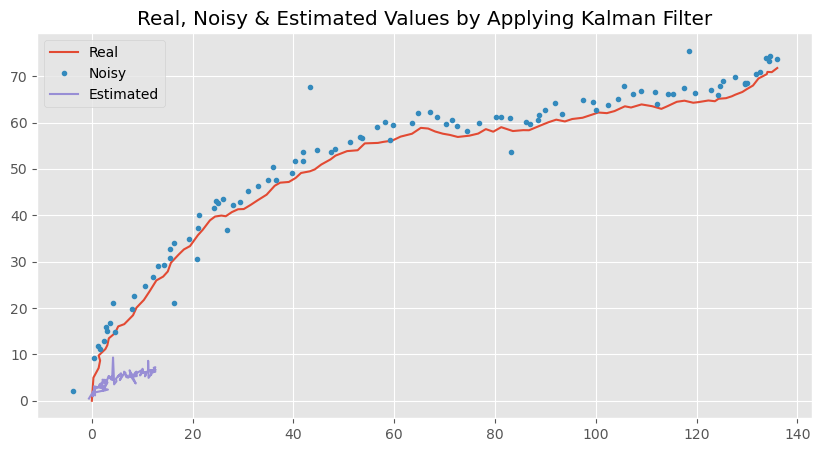

In [76]:
# plotting the estimated trajectory and compare with the real and noisy trajectories
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title('Real, Noisy & Estimated Values by Applying Kalman Filter')
    ax.plot(x, y, label='Real')
    ax.plot(a, b, '.', label='Noisy')
    ax.plot(x_est, y_est, label='Estimated')
    ax.legend()
    plt.show()

### Calculating SD, Absolute Error & RMSE
To evaluate the quality of the model, we will use standard deviation, absolute error, and root mean squared error (RMSE). These measures will be computed on both the true and estimated coordinates. The formulas for these measures are as follows:

<center>
    $\mathrm{RMSE}$ = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$ <br><br>
    $\mathrm{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$ <br><br>
    $\mathrm{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
</center>

Here, $n$ is the total number of coordinates, $y_i$ is the true value of the $i$-th coordinate, and $\hat{y}_i$ is the estimated value of the $i$-th coordinate. The RMSE is a measure of the average distance between the true and estimated coordinates, while the MAE is a measure of the average absolute difference between them. The MSE is a measure of the average squared difference between them.


In [77]:
# calculating mean and standard deviation of absolute error between estimated and real coordinates
abs_error_est = np.abs(np.array([x_est, y_est]).T - np.array([x, y]).T)
mae_est = np.mean(abs_error_est)
std_est = np.std(abs_error_est)

print("Absolute Error of estimated coordinates: {:.4f}".format(mae_est))
print("Deviaton of estimated coordinates: {:.4f}".format(std_est))

# calculating root mean squared error between estimated and real coordinates
rms_error_est = np.sqrt(np.mean(np.square(np.array([x_est, y_est]).T - np.array([x, y]).T)))
print("Root Mean Squared error of estimated coordinates: {:.3f}".format(rms_error_est))

Absolute Error of estimated coordinates: 50.4684
Deviaton of estimated coordinates: 31.1385
Root Mean Squared error of estimated coordinates: 59.302


In [79]:
# calculating mean and standard deviation of absolute error between noisy and real coordinates
abs_error_noisy = np.abs(np.array([a, b]).T - np.array([x, y]).T)
mae_noisy = np.mean(abs_error_noisy)
std_noisy = np.std(abs_error_noisy)
rms_error_noisy = np.sqrt(np.mean(np.square(np.array([a, b]).T - np.array([x, y]).T)))


print("RMS error of noisy coordinates: %.3f" % (rms_error_noisy))
print("MAE of noisy coordinates: %.3f" % (mae_noisy))
print("STD of noisy coordinates: %.3f"  % (std_noisy))

RMS error of noisy coordinates: 2.723
MAE of noisy coordinates: 1.817
STD of noisy coordinates: 2.028
